# Prediction Model for Heart Disease Using Scikit-learn
**This is a milestone project for machine learning**

This notebook utilises various tools and technqiue to create a machine learning model that will predict heart disease of a person based on their medical record.

The following approach is taken to achieve the target goal:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

# Problem Definition

> Given the clinical information regarding a person this model should be able to predict whether a 
person has heart disease or not.


# Data 
Data was collected from UCI Machine Learning Repository, it is also avaiable in Kaggle -https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data.

### Data Dictonary
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

# Evaluation
> If this project can reach 95% accuracy whether or not a person has heart disease during the proof of concept, we will purse this project

In [2]:
# Importing the tools- Pandas, Numpy, Scikit-learn, Seaborn, Matplotlip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score, RocCurveDisplay

In [3]:
# Loading Data
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## EDA
1. Types of Data
2. Missing Data
3. Outliers
4. Add, Change, Remove Data to get more out of the data

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Class identification
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

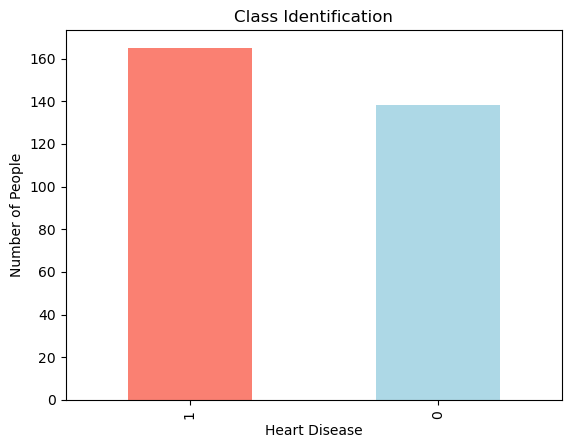

In [7]:
# Plotting the bar chart
ax = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

# Adding labels and title
plt.xlabel("Heart Disease")
plt.ylabel("Number of People")
plt.title("Class Identification")

# Display the plot
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## Missing Value check
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# Frequency relative to Target
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare sex and target 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


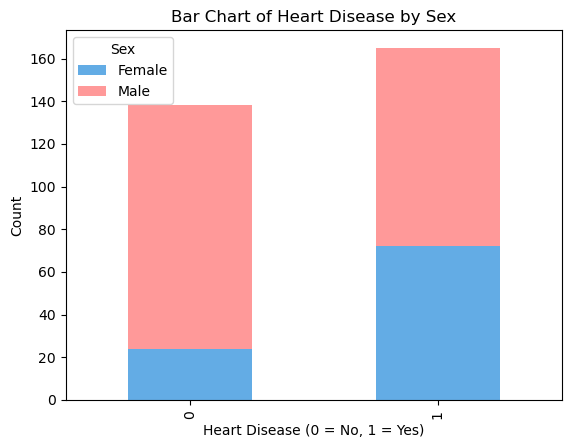

In [14]:
ct_df = pd.crosstab(df.target, df.sex)

# Plot a stacked bar chart
ct_df.plot(kind='bar', stacked=True, color=['#63ACE5', '#FF9999'])

# Set labels and title
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Bar Chart of Heart Disease by Sex')

# Add legend
plt.legend(['Female', 'Male'], title='Sex')

# Show the plot
plt.show()

In [15]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for heart disease

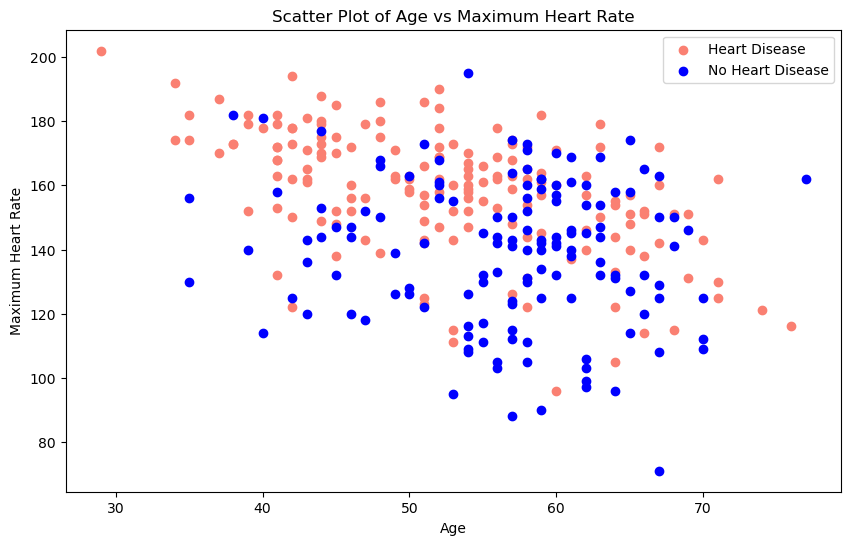

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot for individuals with heart disease (target=1)
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon', label='Heart Disease')

# Scatter plot for individuals without heart disease (target=0)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='blue', label='No Heart Disease')

# Add labels and title
plt.title('Scatter Plot of Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Add legend
plt.legend()

# Show the plot
plt.show()

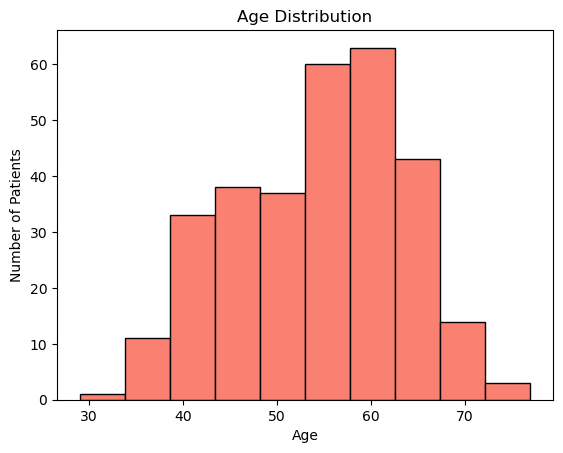

In [17]:
# Check the distribution of age column with a histrogram
df.age.plot.hist(title="Age Distribution", xlabel="Age", ylabel="Number of Patients", color="salmon", edgecolor='black')

# Show the plot
plt.show()


In [18]:
# Chest pain type
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

## Heart Disease per Chest Pain Type
1. Typical Angina:
   * Description: Typical angina is chest pain or discomfort caused by reduced blood flow to the heart. It is a classic symptom of coronary artery disease and is often described as a pressure or squeezing sensation in the chest.
2. Atypical Angina:
    * Description: Atypical angina refers to chest pain that does not fit the typical patterns of classic angina. The pain may be less pronounced or manifest in different areas, making it challenging to diagnose. It still indicates potential heart issues but may present with atypical symptoms.
3. Non-Anginal:
    * Description: Non-anginal chest pain is discomfort in the chest that is not related to reduced blood flow to the heart. It might have various causes, such as muscle strain, gastrointestinal issues, or anxiety. Though not directly linked to heart disease, it requires evaluation to determine the underlying cause.
4. Asymptomatic:
    * Description: Asymptomatic means the absence of noticeable symptoms. In the context of heart disease, individuals with asymptomatic conditions may have heart issues without experiencing chest pain or other typical symptoms. Diagnosis often relies on medical tests and screenings rather than the presence of overt symptoms.

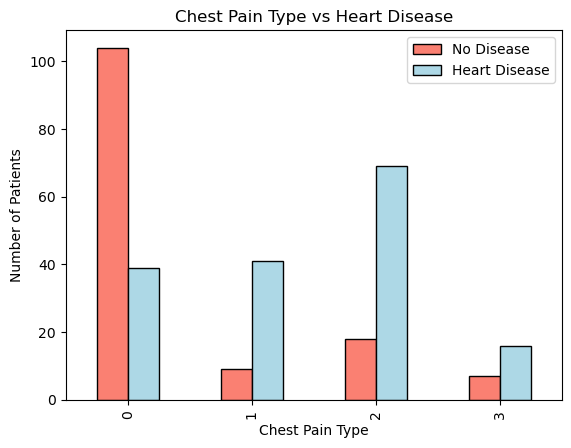

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",title="Chest Pain Type vs Heart Disease", color=["salmon","lightblue"],xlabel="Chest Pain Type",ylabel="Number of Patients",edgecolor='black')
plt.legend(["No Disease","Heart Disease"])
plt.show()

In [139]:
#Correlation Matrix
cor_mat=df.corr()
cor_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


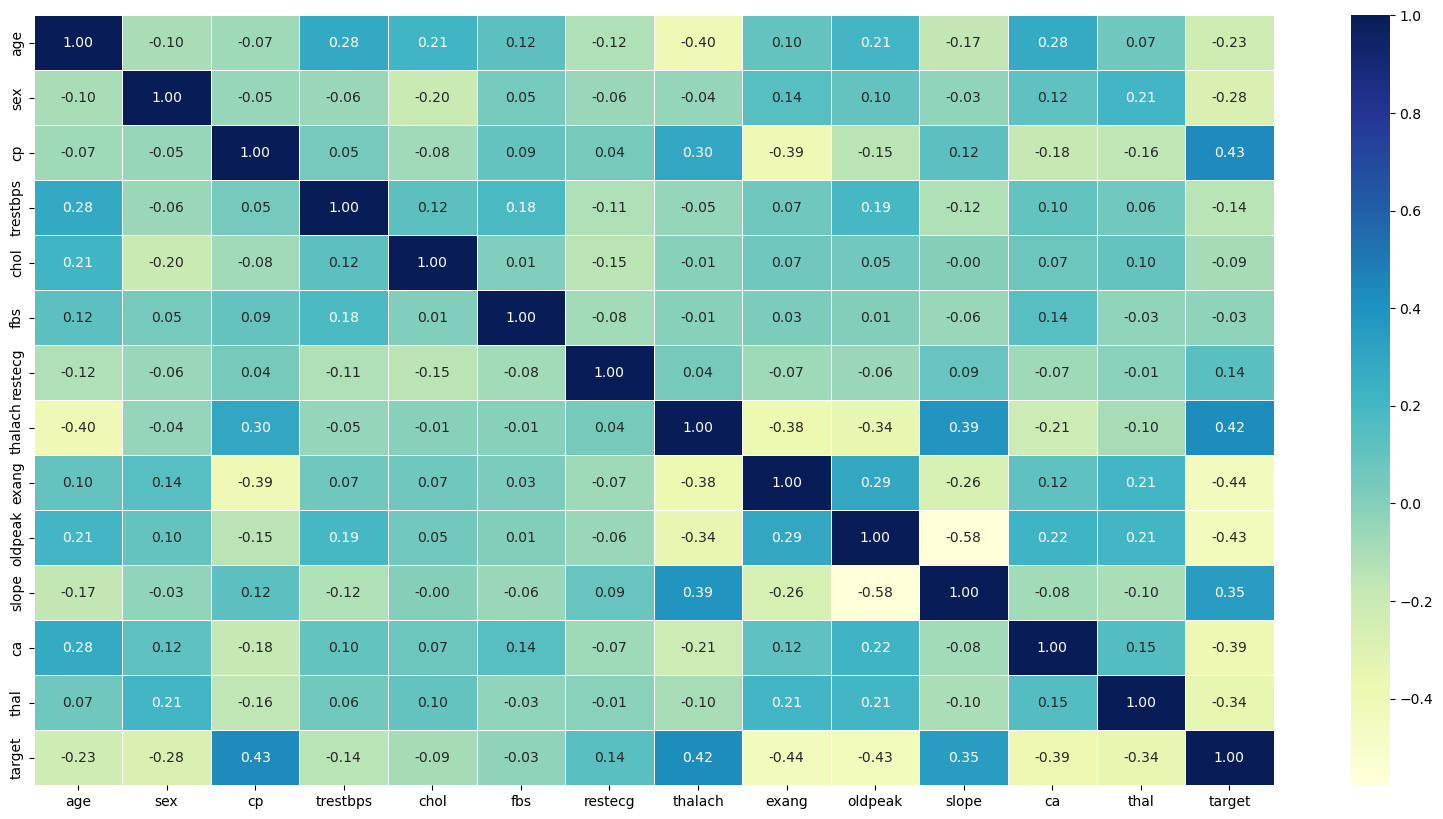

In [21]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

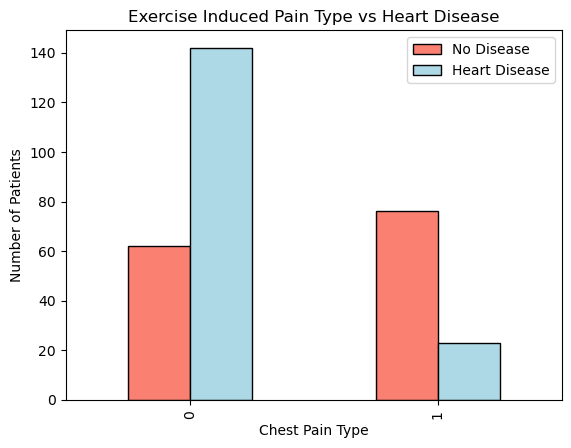

In [22]:
pd.crosstab(df.exang,df.target).plot(kind="bar",title="Exercise Induced Pain Type vs Heart Disease", color=["salmon","lightblue"],xlabel="Chest Pain Type",ylabel="Number of Patients",edgecolor='black')
plt.legend(["No Disease","Heart Disease"])
plt.show()

# Modelling

In [23]:
df.head()
#once again checking for na values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# Spliting into features and label

x = df.drop("target",axis=1)
y = df["target"]

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
#Splitting data in test and train set
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# Model we will be testing and using with this data set are:
1. K-Nearest Neighbour
    * Description: K-Nearest Neighbors is a supervised machine learning algorithm used for classification and regression tasks. It classifies a data point based on how its neighbors are classified. The "k" in KNN refers to the number of nearest neighbors considered when making a prediction. It is a non-parametric and instance-based learning algorithm, making predictions based on the local neighborhood of data points.
2. RandomForestClassifier
    * Description: The RandomForestClassifier is an ensemble learning algorithm that belongs to the family of decision trees. It constructs a multitude of decision trees during training and outputs the mode of the classes (classification) of the individual trees for classification tasks. Random Forests enhance the performance and robustness of a single decision tree by combining the predictions of multiple trees, reducing overfitting and improving generalization.
3. Logistic Regression
    * Description: Despite its name, logistic regression is a classification algorithm commonly used for binary classification problems. It models the probability of a binary outcome by fitting the data to a logistic curve. Logistic regression is a linear model, making it computationally efficient and interpretable. It's particularly useful when the relationship between the features and the target variable is approximately linear, and it provides probabilities that can be converted into class predictions based on a chosen threshold.

In [29]:
# Putting Model In a Dictonary
models = {"Logistic Regression": LogisticRegression(),"RandomForestClassifier" : RandomForestClassifier(),
          "K-Nearest Neighbour": KNeighborsClassifier(),"Ridge":RidgeClassifier(),"MLPClassifier":MLPClassifier(),
         "ExtraTreesClassifier":ExtraTreesClassifier()}
# Creating a function to train and evaluate the models
def train_and_evaluate(models,x_train,y_train,x_test,y_test):
    np.random.seed(42)
    #score dictonary
    model_score = {}
    #loop through model
    for name,model in models.items():
        #fitting the model
        model.fit(x_train,y_train)
        #evaluate the model
        model_score[name]=model.score(x_test,y_test)
        
    return model_score    

In [30]:
models_score = train_and_evaluate(models=models,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

/Users/arbaazmir/Development/milestone-one/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'K-Nearest Neighbour': 0.6885245901639344,
 'Ridge': 0.8688524590163934,
 'MLPClassifier': 0.8688524590163934,
 'ExtraTreesClassifier': 0.8524590163934426}

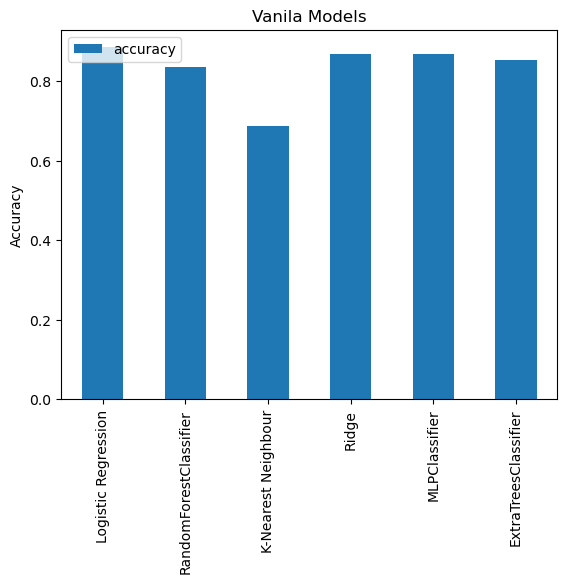

In [32]:
# Assuming you have a variable named models_score with the dictionary you obtained from train_and_evaluate
models_compare = pd.DataFrame(models_score, index=["accuracy"])

# Display the DataFrame
models_compare.T.plot.bar(ylabel= "Accuracy", title= "Vanila Models");


In [33]:
#Hyperparameter Tunning and testing 
# KNN Tunning
train_score=[]
test_score=[]

#tunning parameters
neighbours = range(1,21)

#model instance
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    
train_score,test_score


([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

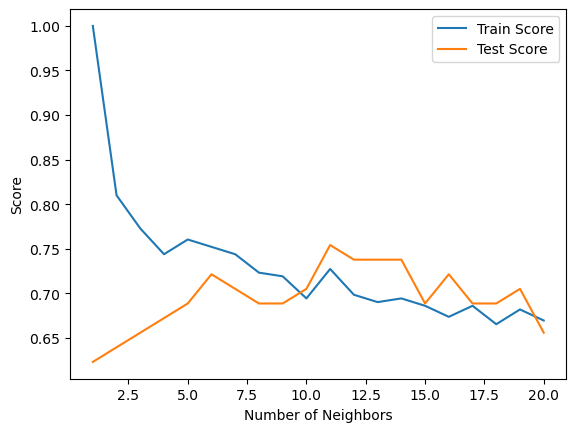

In [34]:
plt.plot(neighbours,train_score,label="Train Score")
plt.plot(neighbours,test_score,label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()

In [35]:
## Tunning with RandomsizedSearchCv - Logistic Regression Model & RandomforestClassifier

#grid for logistic regression
log_red_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]
               } 
#grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)
          }


In [36]:
np.arange(2,20,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [37]:
# Fitting and trying RandominzedSearchCv
np.random.seed(42)
log_reg = LogisticRegression()
log_clf = RandomizedSearchCV(estimator=log_reg,param_distributions=log_red_grid,n_iter=20,cv=5,verbose=2)
log_clf.fit(x_train,y_train)
log_clf.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

0.8852459016393442

In [38]:
log_clf.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
np.random.seed(42)
rm_model =RandomForestClassifier()
rm_clf = RandomizedSearchCV(estimator=rm_model,param_distributions=rf_grid,n_iter=100,cv=5,verbose=2)
rm_clf.fit(x_train,y_train)
rm_clf.score(x_test,y_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_sample

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=860; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=860; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=860; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=860; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=860; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14,

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=860; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=860; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=860; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=860; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=860; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=10; total time=  

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=960; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=6

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=860; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=860; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=860; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=860; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;

0.8852459016393442

In [40]:
rm_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [41]:
np.random.seed(42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 5, 10, 15]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train) 



# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 10}


In [42]:
grid_search.score(x_test,y_test),grid_search.score(x_train,y_train)

(0.8688524590163934, 0.8760330578512396)

In [43]:
# Tunning Logisitic Search Regressionnn Using GridSearchCv

#Hyperparameter Grid 
log_grid_params= {
            "C" : np.logspace(-4,4,30),
            "solver" : ["liblinear"]
}

#setup gridsearch for logistic
gs_log = GridSearchCV(estimator=LogisticRegression(),param_grid=log_grid_params,cv=5,verbose=True)
gs_log.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_log.score(x_test,y_test)

0.8852459016393442

In [46]:
y_pred_rm = rm_clf.predict(x_test)
y_pred_gs = gs_log.predict(x_test)

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_rm': y_pred_rm,
    'Predicted_gs': y_pred_gs
})

# Print the DataFrame
comparison_df

,Actual,Predicted_rm,Predicted_gs
179,0,0,0
228,0,0,1
111,1,1,1
246,0,0,0
60,1,1,1
...,...,...,...
249,0,0,0
104,1,1,1
300,0,0,0
193,0,0,0


### Evaluate model beyond accuracy - 
* ROC Cuve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* f1.

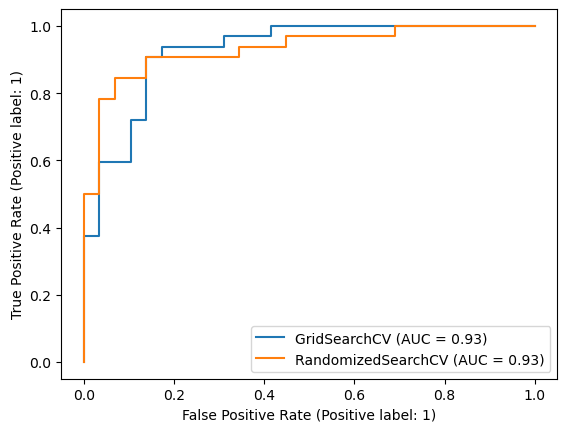

In [47]:
#ROC Curve and AUC
log_disp = RocCurveDisplay.from_estimator(gs_log, x_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rm_clf, x_test, y_test, ax=log_disp.ax_)

In [48]:
# Confusion Matrix
gs_log_confusion_mat= confusion_matrix(y_test,y_pred_gs)

In [49]:
gs_log_confusion_mat

array([[25,  4],
       [ 3, 29]])

In [61]:
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds,title):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis
    plt.title(title)
    


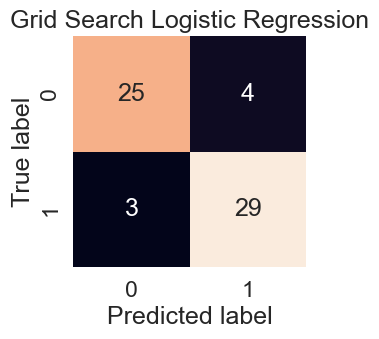

In [62]:
plot_conf_matrix(y_test,y_pred_gs,"Grid Search Logistic Regression")

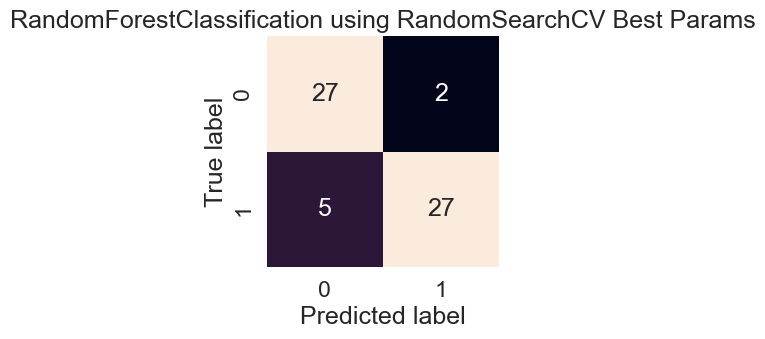

In [67]:
plot_conf_matrix(y_test,y_pred_rm,"RandomForestClassification using RandomSearchCV Best Params")

In [65]:
# Classification Report
print("GS Logistic Regression")
print(classification_report(y_test,y_pred_gs))

GS Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [66]:
# Classification Report
print("RandomForestClassification using RandomSearchCV Best Params")
print(classification_report(y_test,y_pred_rm))

RandomForestClassification using RandomSearchCV Best Params
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [94]:
# Evaluation metrics using cross validation 
#creating a classifier with best params
log_clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
rf_clf = RandomForestClassifier(n_estimators=10,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_depth= 5)

In [95]:
#Cross val accuracy
cv_acc_log = cross_val_score(log_clf,x,y,cv=5,verbose=True,scoring="accuracy")
cv_acc_rf = cross_val_score(rf_clf,x,y,cv=5,verbose=True,scoring="accuracy")
cv_acc_log,cv_acc_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 array([0.83606557, 0.81967213, 0.86885246, 0.78333333, 0.75      ]))

In [96]:
cv_acc_log=np.mean(cv_acc_log)
cv_acc_rf=np.mean(cv_acc_rf)
cv_acc_log,cv_acc_rf

(0.8446994535519124, 0.811584699453552)

In [97]:
#Cross Val Precision
cv_pre_log = cross_val_score(log_clf,x,y,cv=5,verbose=True,scoring="precision")
cv_pre_rf = cross_val_score(rf_clf,x,y,cv=5,verbose=True,scoring="precision")
cv_pre_log,cv_pre_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 array([0.81818182, 0.9       , 0.82352941, 0.82352941, 0.8       ]))

In [98]:
cv_pre_log=np.mean(cv_pre_log)
cv_pre_rf=np.mean(cv_pre_rf)
cv_pre_log,cv_pre_rf

(0.8207936507936507, 0.833048128342246)

In [114]:
#Cross Val Recall
cv_recall_log = cross_val_score(log_clf,x,y,cv=5,verbose=True,scoring="recall")
cv_recall_rf = cross_val_score(rf_clf,x,y,cv=5,verbose=True,scoring="recall")
cv_recall_log,cv_recall_rf


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 array([0.81818182, 0.90909091, 0.78787879, 0.87878788, 0.87878788]))

In [115]:
cv_recall_log=np.mean(cv_recall_log)
cv_recall_rf=np.mean(cv_recall_rf)
cv_recall_log,cv_recall_rf

(0.9212121212121213, 0.8545454545454545)

In [116]:
#Cross Val f1
cv_f1_log = cross_val_score(log_clf,x,y,cv=5,verbose=True,scoring="f1")
cv_f1_rf = cross_val_score(rf_clf,x,y,cv=5,verbose=True,scoring="f1")
cv_f1_log,cv_f1_rf


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055]),
 array([0.84931507, 0.89552239, 0.86567164, 0.8       , 0.81081081]))

In [118]:
cv_f1_log=np.mean(cv_f1_log)
cv_f1_rf=np.mean(cv_f1_rf)
cv_f1_log,cv_f1_rf

(0.8673007976269721, 0.8442639818309416)

In [119]:
cv_metrics_log = pd.DataFrame({"Accuracy":cv_acc_log,"Precision":cv_pre_log,"Recall":cv_recall_log,
                               "F1":cv_f1_log},index=[0])
cv_metrics_rf =  pd.DataFrame({"Accuracy":cv_acc_rf,"Precision":cv_pre_rf,"Recall":cv_recall_rf,
                               "F1":cv_f1_rf},index=[0])

<Axes: title={'center': 'Cross Validated Logistic Regression Metrics'}>

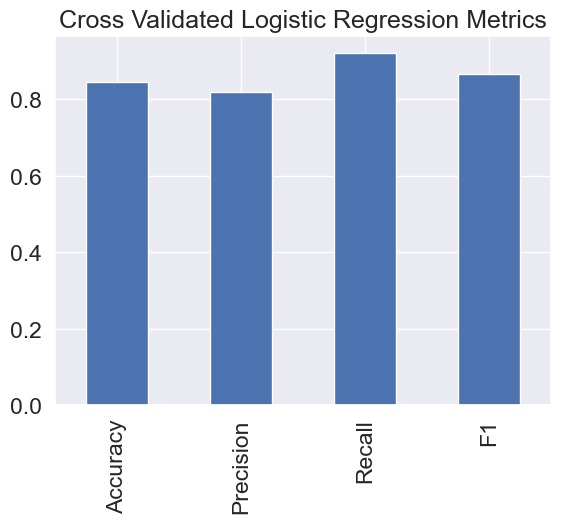

In [125]:
cv_metrics_log.T.plot.bar(title="Cross Validated Logistic Regression Metrics",legend=False)

<Axes: title={'center': 'Cross Validated Logistic Regression Metrics'}>

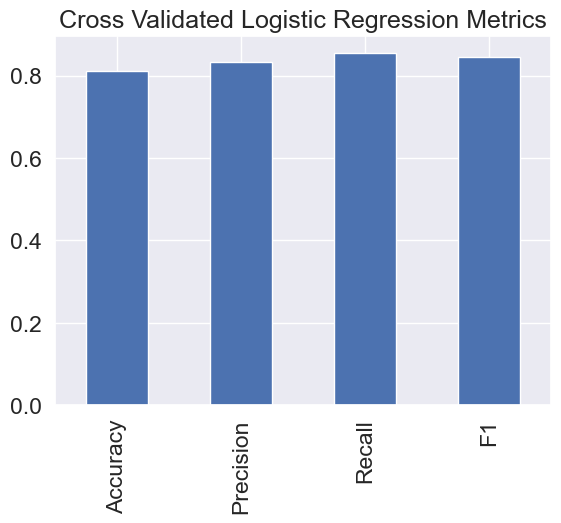

In [126]:
cv_metrics_rf.T.plot.bar(title="Cross Validated Logistic Regression Metrics",legend=False)

In [130]:
print(classification_report(y_true=y_test,y_pred=y_pred_gs))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [131]:
print(classification_report(y_true=y_test,y_pred=y_pred_rm))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Feature Importance
> Features that were the most important for the outcome of the model

In [129]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
log_clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [135]:
log_clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [137]:
feature_dict = dict(zip(df.columns,list(log_clf.coef_[0])))

<Axes: title={'center': 'Feature Importance'}>

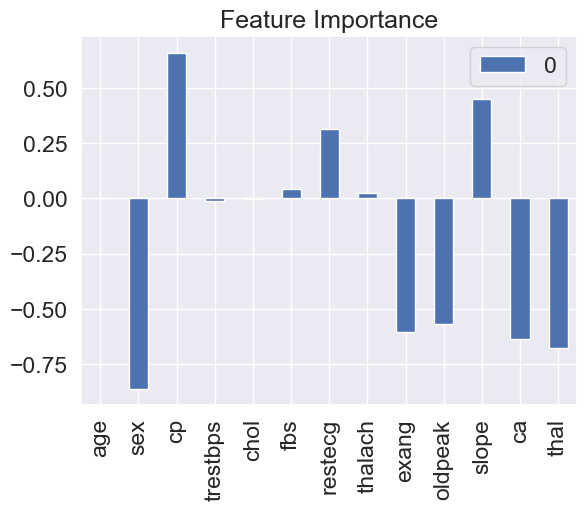

In [138]:
feature_dict_df =pd.DataFrame(feature_dict,index=[0])
feature_dict_df.T.plot.bar(title="Feature Importance")